# Ford GoBike System Data Visualizations
## by Aleen AlSuhaibani

## Investigation Overview

> My overall goals of this presentations to to show my observations on Ford GoBike System's dataset, highlighting the most valuable visualizations.

## Dataset Overview

> Ford GoBike System Lately known as "Bay Wheels" is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. <sup>1</sup> <br> In this project I will be exploring the dataset of Ford GoBike that was collected in February and March of 2019. I will start with data wrangling followed by visualizations of univariate, bivariate, and lastly multivariate explorations.

Ref: https://en.wikipedia.org/wiki/Bay_Wheels

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordGoBike.csv')

## Top 10 Common Station Visualization

> From our univariate explorations we observed that the most common station is __Market St Station__ followed by __San Francisco Caltrain Station 2__ and the third most common station is __Berry St Station__

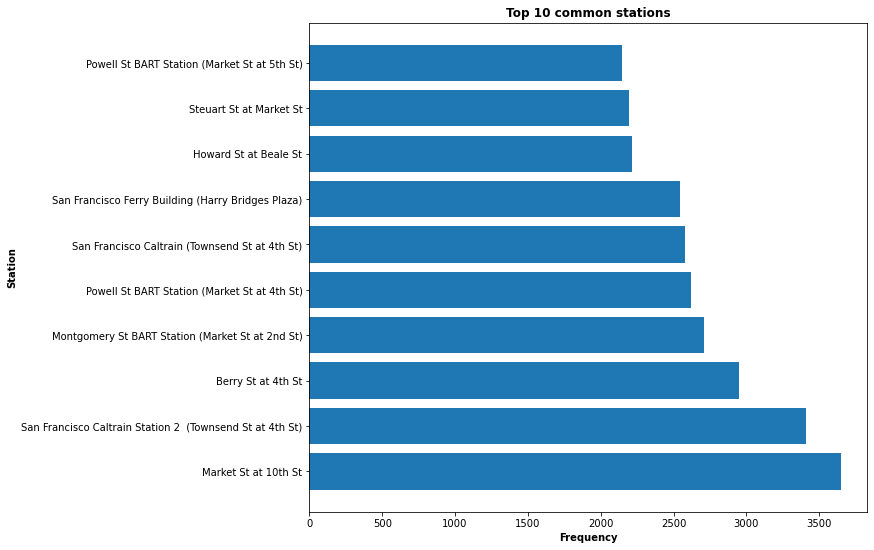

In [5]:
# Top 10 of most common stations
base_color = sb.color_palette()[0] 
yvalues= df.start_station_name.value_counts().head(10).index
xvalues= [3649,3408,2952,2711,2620,2577,2541,2216,2191,2144]
plt.figure(figsize=[10, 9]);
plt.barh(yvalues,xvalues);
plt.title('Top 10 common stations',fontsize=12, weight='bold');
plt.xlabel('Frequency',fontsize=10,weight='bold');
plt.ylabel('Station',fontsize=10,weight='bold');

## Starting & Ending Hours Distribution

> As the figures below show, it appears that members are using the bikes for less than hour, and most commonly at 5pm - 6pm, and 8 am, which implies that they are mostly using it to commute to/from work.

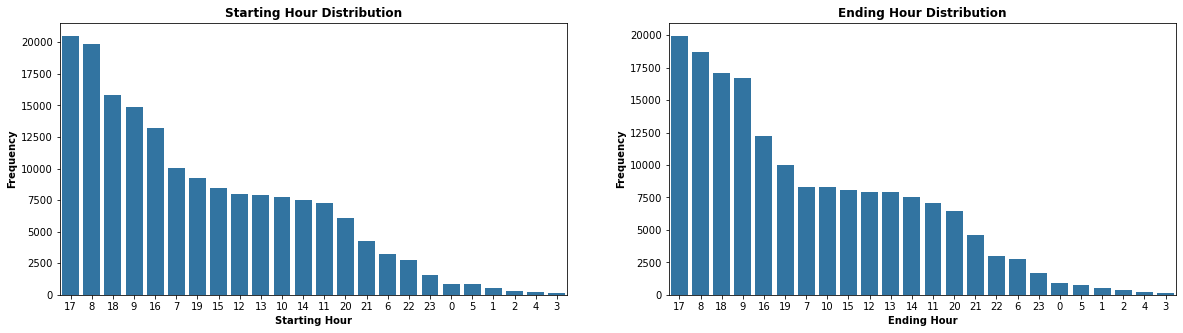

In [10]:
# plotting a distribution of start hours as well as end hours
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
order_by_count = df.start_hour.value_counts().index
sb.countplot(data= df, x='start_hour', color = base_color, order=order_by_count);
plt.title('Starting Hour Distribution',fontsize=12, weight='bold');
plt.xlabel('Starting Hour',fontsize=10,weight='bold');
plt.ylabel('Frequency',fontsize=10,weight='bold');

plt.subplot(1, 2, 2) 
order_by_count = df.end_hour.value_counts().index
sb.countplot(data= df, x='end_hour', color = base_color, order=order_by_count);
plt.title('Ending Hour Distribution',fontsize=12, weight='bold');
plt.xlabel('Ending Hour',fontsize=10,weight='bold');
plt.ylabel('Frequency',fontsize=10,weight='bold');

## Distribution of Members' Age vs Trip Duration
> We can see from the scatter plot below that that younger people from 20-40 tend to take longer rides than older people.

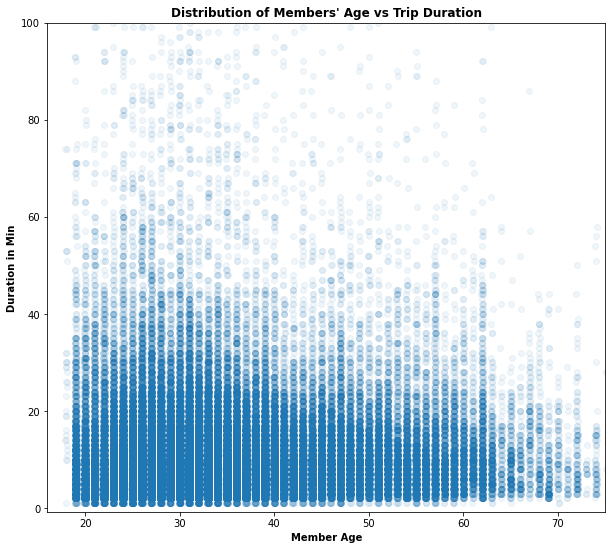

In [11]:
plt.figure(figsize=[10, 9]);
sb.regplot(data=df,x='member_age', y='duration_min',fit_reg = False ,x_jitter=0.1, scatter_kws={'alpha':1/15});
plt.axis([16, 75, -0.75, 100])
plt.title('Distribution of Members\' Age vs Trip Duration',fontsize=12, weight='bold');
plt.xlabel('Member Age',fontsize=10,weight='bold');
plt.ylabel('Duration in Min',fontsize=10,weight='bold');

## Distribution of Trip days based on User Type and Avg. Duration
> From the below distributions, We can observe a significant difference between Customers and Subcribers, subscribers usage for bicycles tends to follow a steady pattern on weekdays and having a slight peak on weekends.
On the other hand, customer usage appears to be unpredictable on weekdays in comparison to the weekends having a high peak that average trips could take about 27 minutes long.

In [3]:
user_classes = ['Customer', 'Subscriber']
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=user_classes)
df['user_type'] = df['user_type'].astype(userclasses);
df['trip_day']= df['trip_day'].astype(str);

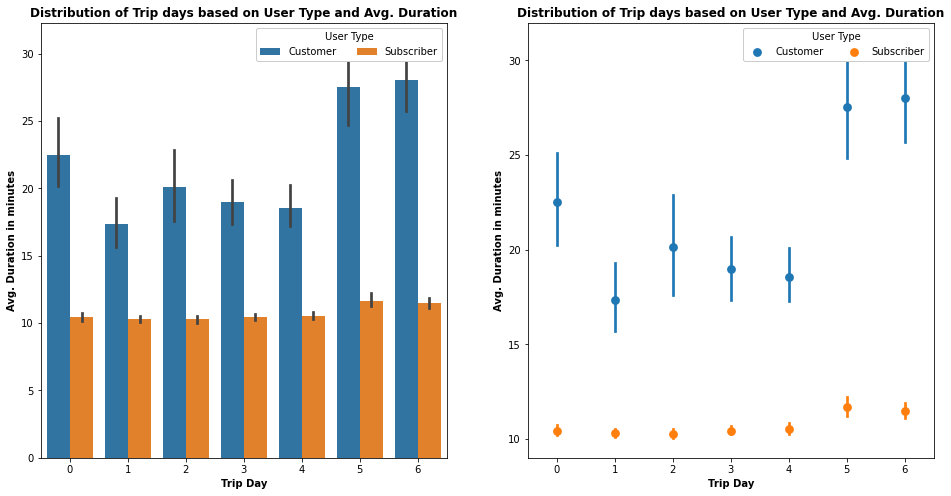

In [7]:
plt.figure(figsize=[16,8])
order= ['0','1','2','3','4','5','6']

plt.subplot(1,2,1);
ax=sb.barplot(data=df,x='trip_day',y='duration_min',order=order, hue='user_type');
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type');
plt.title('Distribution of Trip days based on User Type and Avg. Duration',fontsize=12, weight='bold');
plt.ylabel('Avg. Duration in minutes',fontsize=10, weight='bold');
plt.xlabel('Trip Day',fontsize=10, weight='bold');

plt.subplot(1,2,2)
axx=sb.pointplot(data=df,x='trip_day',y='duration_min',linestyles="", order=order,hue='user_type');
axx.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type');
plt.title('Distribution of Trip days based on User Type and Avg. Duration',fontsize=12, weight='bold');
plt.ylabel('Avg. Duration in minutes',fontsize=10, weight='bold');
plt.xlabel('Trip Day',fontsize=10, weight='bold');

In [9]:
!jupyter nbconvert Ford-GoBike-System-Data-Visualizations.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Ford-GoBike-System-Data-Visualizations.ipynb to slides
[NbConvertApp] Writing 917314 bytes to Ford-GoBike-System-Data-Visualizations.slides.html
